In [251]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print("We're using TF", tf.__version__)

We're using TF 2.8.0


In [252]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

X_train_flat = train_X.reshape((train_X.shape[0], -1))
X_val_flat = test_X.reshape((test_X.shape[0], -1))

y_train_oh = tf.keras.utils.to_categorical(train_y)
y_val_oh = tf.keras.utils.to_categorical(test_y)


In [253]:
# run this again if you remake your graph
tf.reset_default_graph()

In [254]:
# Placeholders for the input data
input_X = tf.placeholder('float32', shape=(None,784))
input_y = tf.placeholder('int32', shape=(None, 10))

### 1. Выбор функции активации

<IPython.core.display.Javascript object>


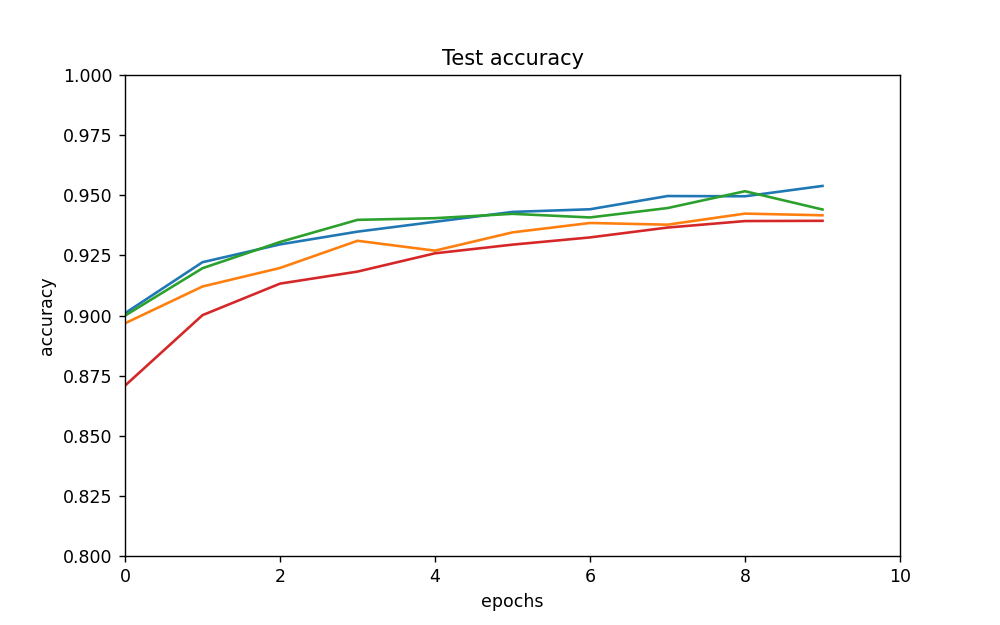

C:\Users\Сено\AppData\Local\Temp\ipykernel_3232\2286643891.py:7: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits1 = tf.layers.dense(input_X, 256, activation = tf.nn.sigmoid)
c:\users\сено\python 64bit\lib\site-packages\keras\legacy_tf_layers\core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
C:\Users\Сено\AppData\Local\Temp\ipykernel_3232\2286643891.py:14: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits2 = tf.layers.dense(logits1, 10, activation = None)
c:\users\сено\python 64bit\lib\site-packages\tensorflow\python\client\session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close

In [255]:
%matplotlib notebook

figure, ax = plt.subplots(figsize=(8, 5))

for k in range(4):
    if k == 0:
        logits1 = tf.layers.dense(input_X, 256, activation = tf.nn.sigmoid)
    if k == 1:
        logits1 = tf.layers.dense(input_X, 256, activation = tf.nn.tanh)
    if k == 2:
        logits1 = tf.layers.dense(input_X, 256, activation = tf.nn.relu)
    if k == 3:
        logits1 = tf.layers.dense(input_X, 256, activation = tf.nn.relu6)
    logits2 = tf.layers.dense(logits1, 10, activation = None)
    probas = tf.nn.softmax(logits2)
    classes = tf.argmax(probas, axis=1)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=input_y, logits=logits2))

    step = tf.train.AdamOptimizer().minimize(loss)

    np.random.seed(42)
    s = tf.InteractiveSession()
    s.run(tf.global_variables_initializer())

    BATCH_SIZE = 1024
    EPOCHS = 10


    x = []
    y = []
    # to run GUI event loop
    plt.ion()

    # here we are creating sub plots

    line1, = ax.plot(x, y)
    ax.set_title('Test accuracy')
    ax.set_xlabel('epochs')
    ax.set_ylabel('accuracy')


    for epoch in range(EPOCHS):  # we finish an epoch when we've looked at all training samples
        batch_losses = []
        for batch_start in range(0, X_train_flat.shape[0], BATCH_SIZE):  # data is already shuffled
            _, batch_loss = s.run([step, loss], {input_X: X_train_flat[batch_start:batch_start+BATCH_SIZE], 
                                                 input_y: y_train_oh[batch_start:batch_start+BATCH_SIZE]})
            # collect batch losses, this is almost free as we need a forward pass for backprop anyway
            batch_losses.append(batch_loss)

        train_loss = np.mean(batch_losses)
        test_loss = s.run(loss, {input_X: X_val_flat, input_y: y_val_oh})  # this part is usually small
        train_accuracy = accuracy_score(train_y, s.run(classes, {input_X: X_train_flat}))  # this is slow and usually skipped
        test_accuracy = accuracy_score(test_y, s.run(classes, {input_X: X_val_flat})) 
         # creating new Y values
        x.append(epoch)
        y.append(test_accuracy)
        line1.set_xdata(x)
        line1.set_ydata(y)
        ax.set_ylim(0.8, 1)
        ax.set_xlim(0, EPOCHS)
        figure.canvas.draw()
        figure.canvas.flush_events()    

    s.close()

### 2. Проблема размера нейрона

<IPython.core.display.Javascript object>


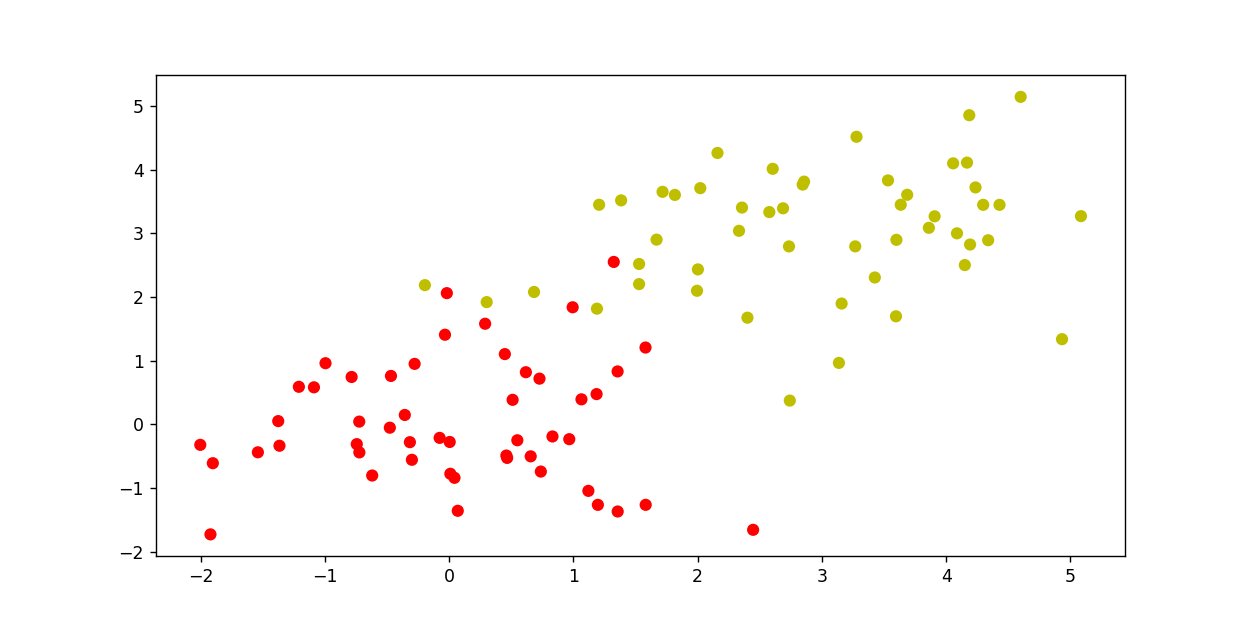

In [242]:
from sklearn.datasets import make_blobs
data = make_blobs(n_features=2, centers=[[0, 0], [3, 3]], random_state=242)
X = data[0]
y = np.zeros((len(X), 2))
y[:,0] = data[1]
y[:,1][y[:, 1] == data[1]] = 1
fig = plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], c=['r' if i == 0 else 'y' for i in y[:,0]])

In [243]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X
X_test = X
y_train = y
y_test = y

In [244]:
# run this again if you remake your graph
tf.reset_default_graph()
# Placeholders for the input data
input_X = tf.placeholder('float32', shape=(None,2))
input_y = tf.placeholder('int32', shape=(None,2))

<IPython.core.display.Javascript object>


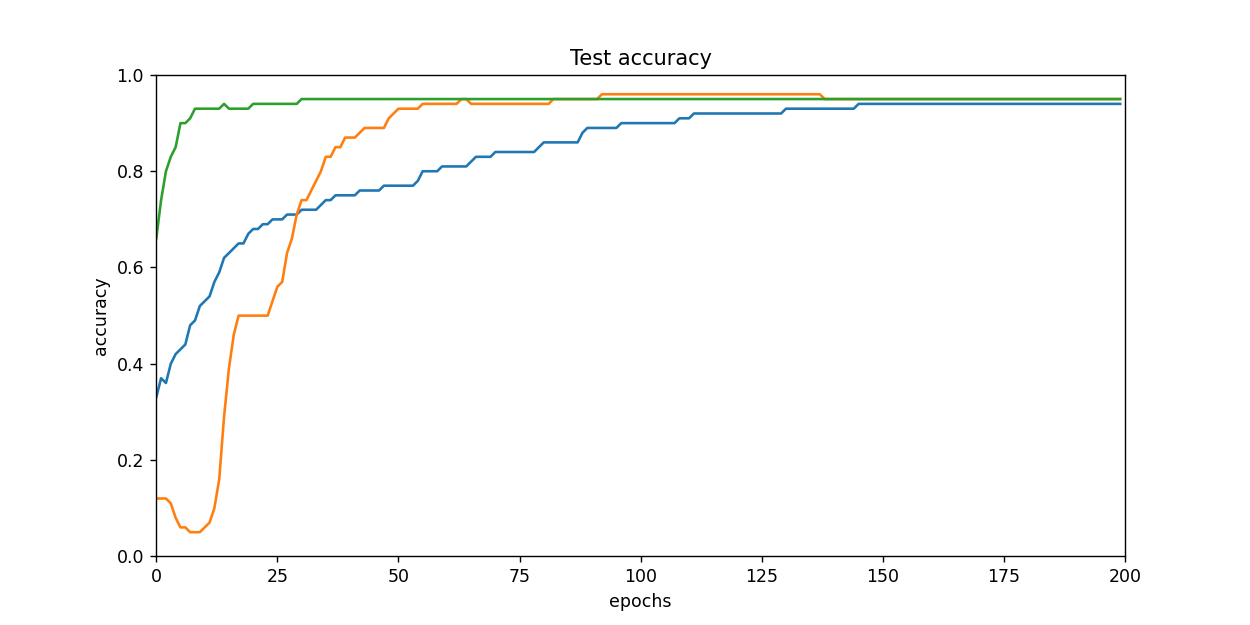

<IPython.core.display.Javascript object>


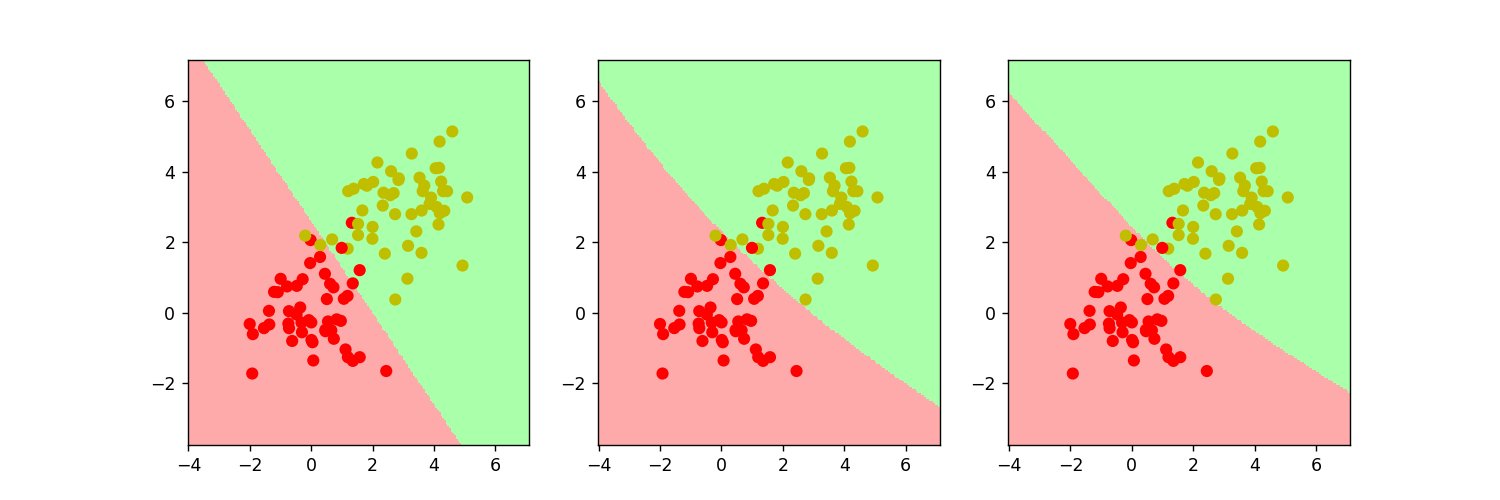

C:\Users\Сено\AppData\Local\Temp\ipykernel_3232\3513233090.py:14: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  output = tf.layers.dense(hidden1, 2, activation = None)
c:\users\сено\python 64bit\lib\site-packages\keras\legacy_tf_layers\core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
c:\users\сено\python 64bit\lib\site-packages\tensorflow\python\client\session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
C:\Users\Сено\AppData\Local\Temp\ipykernel_3232\3513233090.py:10: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future

In [250]:
%matplotlib notebook
from matplotlib.colors import ListedColormap
figure, ax = plt.subplots(figsize=(10, 5))
fig, ax1 = plt.subplots(1,3, figsize=(12,4))

for k in range(3):
    if k == 0:
        hidden1 = input_X
    elif k == 1:
        hidden1 = tf.layers.dense(input_X, 6, activation = tf.nn.sigmoid)
    elif k == 2:
        hidden1 = tf.layers.dense(input_X, 20, activation = tf.nn.sigmoid)
    
    output = tf.layers.dense(hidden1, 2, activation = None)
#     output = tf.layers.dense(input_X, 2, activation = None)
    probas = tf.nn.softmax(output)
    classes = tf.argmax(probas, axis=1)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=input_y, logits=output))
    
    np.random.seed(42)
    step = tf.train.AdamOptimizer().minimize(loss)
    s = tf.InteractiveSession()
    s.run(tf.global_variables_initializer())

    BATCH_SIZE = 10
    EPOCHS = 200


    ep = []
    ta = []
    # to run GUI event loop
    plt.ion()

    # here we are creating sub plots

    line1, = ax.plot(ep, ta)
    ax.set_title('Test accuracy')
    ax.set_xlabel('epochs')
    ax.set_ylabel('accuracy')


    for epoch in range(EPOCHS):  # we finish an epoch when we've looked at all training samples
        batch_losses = []
        for batch_start in range(0, X_train.shape[0], BATCH_SIZE):  # data is already shuffled
            _, batch_loss = s.run([step, loss], {input_X: X_train[batch_start:batch_start+BATCH_SIZE], 
                                                 input_y: y_train[batch_start:batch_start+BATCH_SIZE]})
            # collect batch losses, this is almost free as we need a forward pass for backprop anyway
            batch_losses.append(batch_loss)

        train_loss = np.mean(batch_losses)
        test_loss = s.run(loss, {input_X: X_test, input_y: y_test})  # this part is usually small
        train_accuracy = accuracy_score(y_train[:,1], s.run(classes, {input_X: X_train}))  # this is slow and usually skipped
        test_accuracy = accuracy_score(y_test[:,1], s.run(classes, {input_X: X_test})) 

        ep.append(epoch)
        ta.append(test_accuracy)
        line1.set_xdata(ep)
        line1.set_ydata(ta)
        ax.set_ylim(0, 1)
        ax.set_xlim(0, EPOCHS)
        figure.canvas.draw()
        figure.canvas.flush_events() 
    
    eps = 2
    xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
    Z = np.c_[xx.ravel(), yy.ravel()]
    Z = s.run(classes, {input_X: Z})
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'][::-1])
    ax1[k].pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax1[k].scatter(X[:,0], X[:,1], c=['r' if i == 0 else 'y' for i in y[:,0]])

    s.close()

In [249]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X, data[1])
accuracy_score(data[1], reg.predict(X_test))

0.96

### 3. Где действительно надо много

<IPython.core.display.Javascript object>


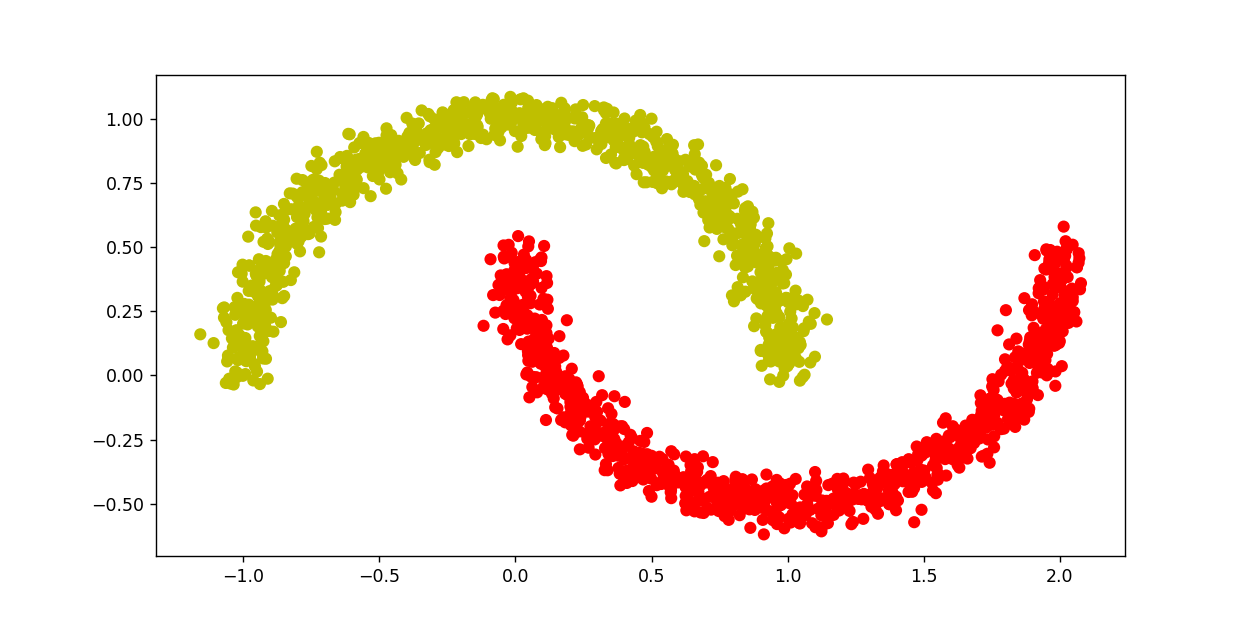

In [287]:
from sklearn.datasets import make_circles, make_moons
data = make_circles(n_samples=2000, factor=0.5, noise=0.05)
data = make_moons(n_samples=2000, noise=0.05)
X = data[0]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(data[1][:, np.newaxis]).toarray()
fig = plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], c=['r' if i == 0 else 'y' for i in y[:,0]])

In [288]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X
X_test = X
y_train = y
y_test = y

In [289]:
# run this again if you remake your graph
tf.reset_default_graph()
# Placeholders for the input data
input_X = tf.placeholder('float32', shape=(None,2))
input_y = tf.placeholder('int32', shape=(None,2))

<IPython.core.display.Javascript object>


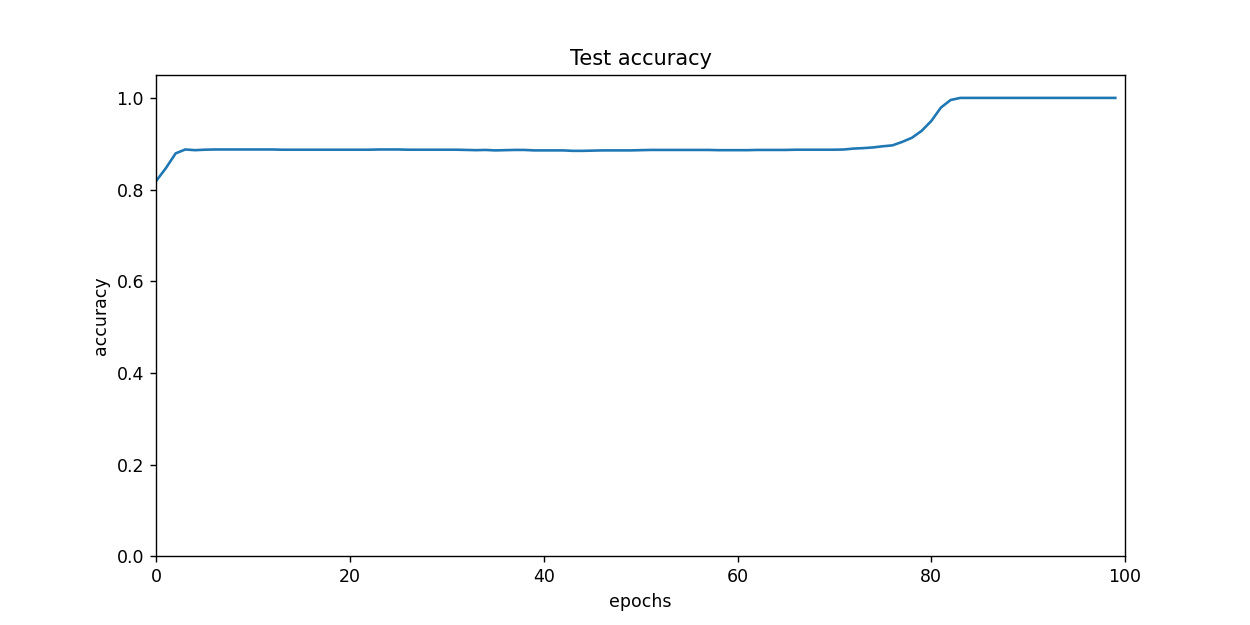

<IPython.core.display.Javascript object>


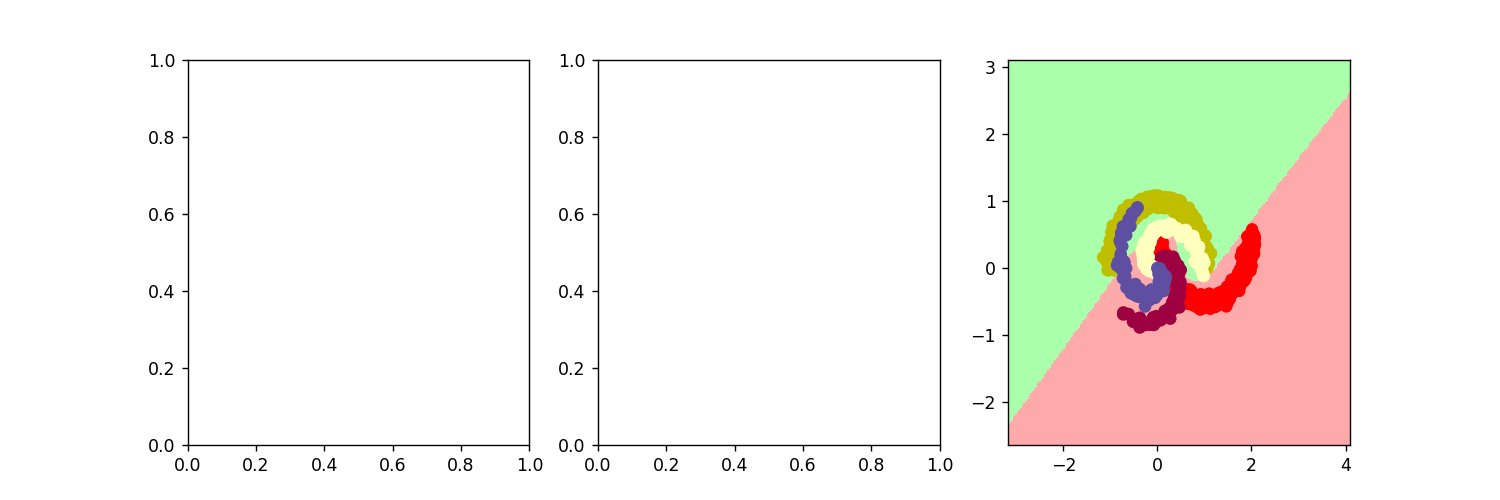

C:\Users\Сено\AppData\Local\Temp\ipykernel_3232\3168584322.py:14: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hidden1 = tf.layers.dense(input_X, 80, activation = tf.nn.sigmoid)
c:\users\сено\python 64bit\lib\site-packages\keras\legacy_tf_layers\core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
C:\Users\Сено\AppData\Local\Temp\ipykernel_3232\3168584322.py:15: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hidden1 = tf.layers.dense(hidden1, 80, activation = tf.nn.sigmoid)
C:\Users\Сено\AppData\Local\Temp\ipykernel_3232\3168584322.py:16: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hidden1 = tf.layers.dense(hidden1, 4

In [290]:
%matplotlib notebook
from matplotlib.colors import ListedColormap
figure, ax = plt.subplots(figsize=(10, 5))
fig, ax1 = plt.subplots(1,3, figsize=(12,4))

for k in range(3):
    if k == 0:
        continue
        hidden1 = input_X
    elif k == 1:
        continue
        hidden1 = tf.layers.dense(input_X, 6, activation = tf.nn.sigmoid)
    elif k == 2:
        hidden1 = tf.layers.dense(input_X, 80, activation = tf.nn.sigmoid)
        hidden1 = tf.layers.dense(hidden1, 80, activation = tf.nn.sigmoid)
        hidden1 = tf.layers.dense(hidden1, 40, activation = tf.nn.sigmoid)
    
    output = tf.layers.dense(hidden1, 2, activation = None)
#     output = tf.layers.dense(input_X, 2, activation = None)
    probas = tf.nn.softmax(output)
    classes = tf.argmax(probas, axis=1)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=input_y, logits=output))
    
    np.random.seed(42)
    step = tf.train.AdamOptimizer().minimize(loss)
    s = tf.InteractiveSession()
    s.run(tf.global_variables_initializer())

    BATCH_SIZE = 10
    EPOCHS = 100


    ep = []
    ta = []
    # to run GUI event loop
    plt.ion()

    # here we are creating sub plots

    line1, = ax.plot(ep, ta)
    ax.set_title('Test accuracy')
    ax.set_xlabel('epochs')
    ax.set_ylabel('accuracy')


    for epoch in range(EPOCHS):  # we finish an epoch when we've looked at all training samples
        batch_losses = []
        for batch_start in range(0, X_train.shape[0], BATCH_SIZE):  # data is already shuffled
            _, batch_loss = s.run([step, loss], {input_X: X_train[batch_start:batch_start+BATCH_SIZE], 
                                                 input_y: y_train[batch_start:batch_start+BATCH_SIZE]})
            # collect batch losses, this is almost free as we need a forward pass for backprop anyway
            batch_losses.append(batch_loss)

        train_loss = np.mean(batch_losses)
        test_loss = s.run(loss, {input_X: X_test, input_y: y_test})  # this part is usually small
        train_accuracy = accuracy_score(y_train[:,1], s.run(classes, {input_X: X_train}))  # this is slow and usually skipped
        test_accuracy = accuracy_score(y_test[:,1], s.run(classes, {input_X: X_test})) 

        ep.append(epoch)
        ta.append(test_accuracy)
        line1.set_xdata(ep)
        line1.set_ydata(ta)
        ax.set_ylim(0, 1.05)
        ax.set_xlim(0, EPOCHS)
        figure.canvas.draw()
        figure.canvas.flush_events() 
    
    eps = 2
    xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
    Z = np.c_[xx.ravel(), yy.ravel()]
    Z = s.run(classes, {input_X: Z})
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'][::-1])
    ax1[k].pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax1[k].scatter(X[:,0], X[:,1], c=['r' if i == 0 else 'y' for i in y[:,0]])

    s.close()

### 4. Посложнее

<IPython.core.display.Javascript object>


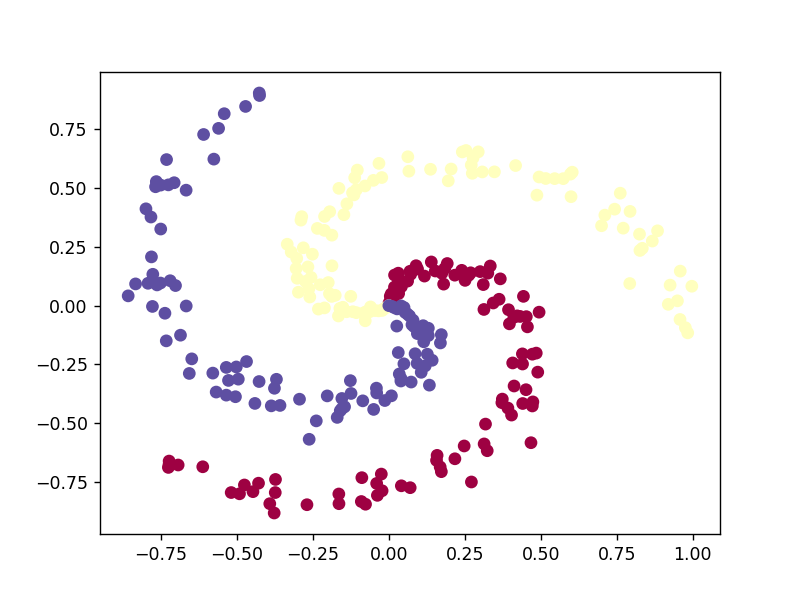

In [315]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [316]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
new_y = ohe.fit_transform(y[:, np.newaxis]).toarray()

In [317]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X
X_test = X
y_train = new_y
y_test = new_y

In [318]:
# run this again if you remake your graph
tf.reset_default_graph()
# Placeholders for the input data
input_X = tf.placeholder('float32', shape=(None,2))
input_y = tf.placeholder('int32', shape=(None,3))

<IPython.core.display.Javascript object>


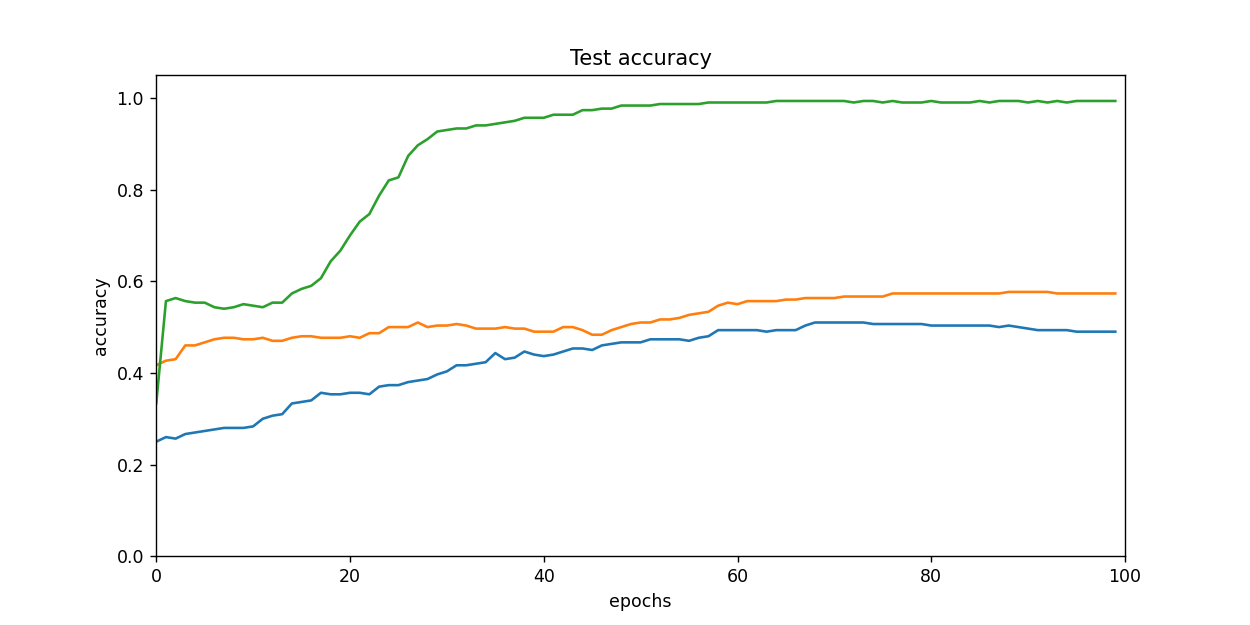

<IPython.core.display.Javascript object>


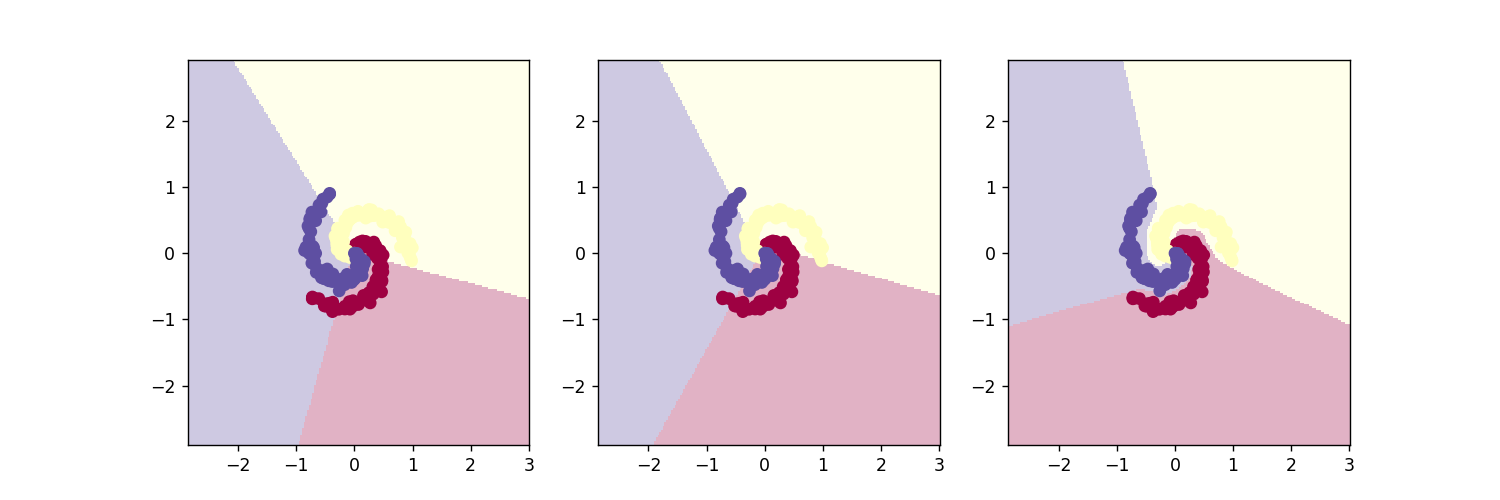

C:\Users\Сено\AppData\Local\Temp\ipykernel_3232\4173358892.py:15: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  output = tf.layers.dense(hidden1, 3, activation = None)
c:\users\сено\python 64bit\lib\site-packages\keras\legacy_tf_layers\core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
c:\users\сено\python 64bit\lib\site-packages\tensorflow\python\client\session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
C:\Users\Сено\AppData\Local\Temp\ipykernel_3232\4173358892.py:10: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future

In [328]:
%matplotlib notebook
from matplotlib.colors import ListedColormap
figure, ax = plt.subplots(figsize=(10, 5))
fig, ax1 = plt.subplots(1,3, figsize=(12,4))

for k in range(3):
    if k == 0:
        hidden1 = input_X
    elif k == 1:
        hidden1 = tf.layers.dense(input_X, 6, activation = tf.nn.relu)
    elif k == 2:
        hidden1 = tf.layers.dense(input_X, 80, activation = tf.nn.relu)
        hidden1 = tf.layers.dense(hidden1, 80, activation = tf.nn.relu)
    
    output = tf.layers.dense(hidden1, 3, activation = None)
    probas = tf.nn.softmax(output)
    classes = tf.argmax(probas, axis=1)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=input_y, logits=output))
    
    np.random.seed(42)
    step = tf.train.AdamOptimizer().minimize(loss)
    s = tf.InteractiveSession()
    s.run(tf.global_variables_initializer())

    BATCH_SIZE = 10
    EPOCHS = 100


    ep = []
    ta = []
    # to run GUI event loop
    plt.ion()

    # here we are creating sub plots

    line1, = ax.plot(ep, ta)
    ax.set_title('Test accuracy')
    ax.set_xlabel('epochs')
    ax.set_ylabel('accuracy')


    for epoch in range(EPOCHS):  # we finish an epoch when we've looked at all training samples
        batch_losses = []
        for batch_start in range(0, X_train.shape[0], BATCH_SIZE):  # data is already shuffled
            _, batch_loss = s.run([step, loss], {input_X: X_train[batch_start:batch_start+BATCH_SIZE], 
                                                 input_y: y_train[batch_start:batch_start+BATCH_SIZE]})
            # collect batch losses, this is almost free as we need a forward pass for backprop anyway
            batch_losses.append(batch_loss)

        train_loss = np.mean(batch_losses)
        test_loss = s.run(loss, {input_X: X_test, input_y: y_test})  # this part is usually small
        train_accuracy = accuracy_score(y, s.run(classes, {input_X: X_train}))  # this is slow and usually skipped
        test_accuracy = accuracy_score(y, s.run(classes, {input_X: X_test})) 

        ep.append(epoch)
        ta.append(test_accuracy)
        line1.set_xdata(ep)
        line1.set_ydata(ta)
        ax.set_ylim(0, 1.05)
        ax.set_xlim(0, EPOCHS)
        figure.canvas.draw()
        figure.canvas.flush_events() 
    
    eps = 2
    xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
    Z = np.c_[xx.ravel(), yy.ravel()]
    Z = s.run(classes, {input_X: Z})
    Z = Z.reshape(xx.shape)

    ax1[k].pcolormesh(xx, yy, Z, alpha = 0.3, cmap=plt.cm.Spectral)
    ax1[k].scatter(X[:,0], X[:,1],c=y, s=40, cmap=plt.cm.Spectral)

    s.close()